<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# <center> <font color = red> BOOK Recommendation Engine </center>

### In this Data Science project, we will see how to build a Book Recommendation System model using Machine Learning Techniques.

## 1) Problem Statement :- 

Github link given (https://github.com/nbijave123/Books-Recommender/blob/main/BX-Recommend.zip)

***We have three dataset*** >> 
- Books :- In this dataset we have information of 271368 books with ISBN no.
- Users :- In this dataset we have information of 278858 users and information  of Location, Age.
- Ratings :- In this dataset we have ratings information of 1149780 users book ratings.
 
  From these aforesaid information we want to build a Book Recommendation System Model with Machine Learning, which is useful to recommend other options of books available with good rating by other users.

 

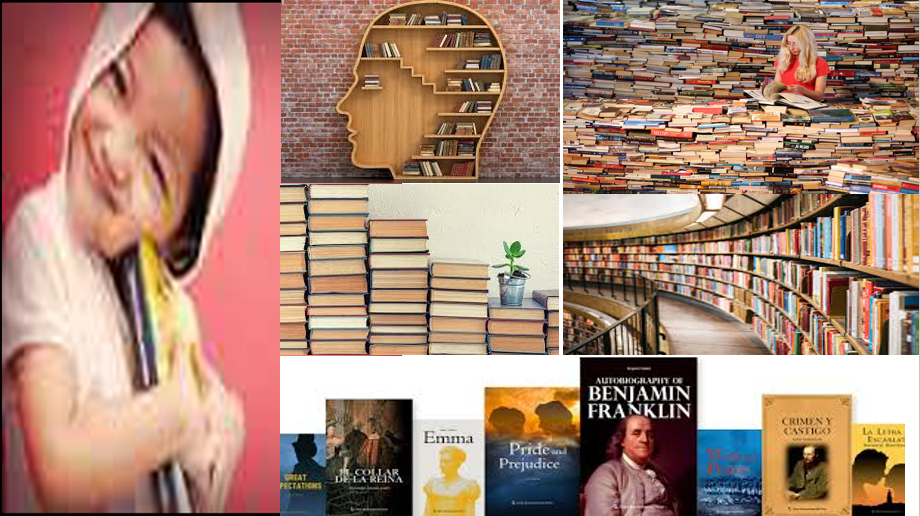

## 2) Solution :-


### i) Let's Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Please note the github link for datasets (ZIP file) -
(https://github.com/nbijave123/Books-Recommender/blob/main/BX-Recommend.zip)

In [2]:
books = pd.read_csv('BX-Books.csv', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [3]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


### ii) Books Dataset Information

In [5]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271368 entries, 0 to 271367
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ISBN               271368 non-null  object 
 1   bookTitle          271368 non-null  object 
 2   bookAuthor         233754 non-null  object 
 3   yearOfPublication  232410 non-null  float64
 4   publisher          232408 non-null  object 
 5   imageUrlS          228148 non-null  object 
 6   imageUrlM          228148 non-null  object 
 7   imageUrlL          228148 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


### iii) Users Dataset Information

In [7]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### iv) Ratings Dataset Information

In [9]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### v) Exploratory Data Analysis (EDA)

- Let's see the summary statistics of rating.

In [11]:
ratings['bookRating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: bookRating, dtype: float64

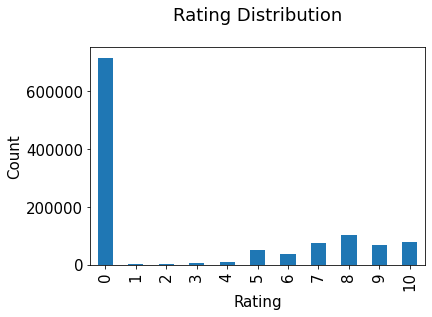

In [12]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

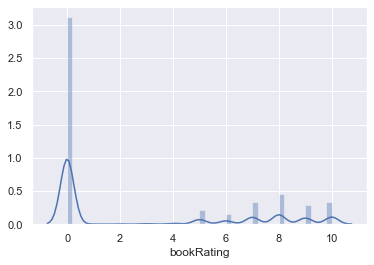

In [13]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['bookRating'].fillna(ratings['bookRating'].median()))

- It appears that user are not rating books. More than half of books have rating of 0 and negligent rating to scale 1 to 4.
- rating scale 5 to 10 is good response to books in list.

In [14]:
print(books.shape)                          # shape and columns of books dataset
print(list(books.columns))

(271368, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [15]:
print(users.shape)                          # shape and columns of users dataset
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


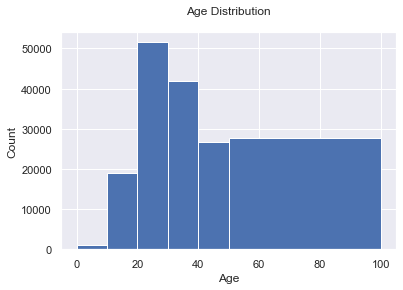

In [16]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])    # Let's compare users age from users dataset
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### vi) Let's see the rating_f from value_counts() of userID and bookRating >= 100.

In [17]:
counts1 = ratings['userID'].value_counts()
ratings1 = ratings[ratings['userID'].isin(counts1[counts1 >= 100].index)]
counts2 = ratings1['bookRating'].value_counts()
ratings_f = ratings1[ratings1['bookRating'].isin(counts2[counts2 >= 100].index)]

In [18]:
ratings_f.head(5)

,userID,ISBN,bookRating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0


### Part I  - Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.

In [19]:
combine_book_rating = pd.merge(ratings_f, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...


In [20]:
#Now we will group by book titles and create a new column for total rating count.
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,Earth Prayers From around the World: 365 Prayers,5
1,Final Fantasy Anthology: Official Strategy Gu...,4
2,Flight of Fancy: American Heiresses (Zebra Ba...,2
3,Little Comic Shop of Horrors (Give Yourself G...,4
4,Mystery Mile,2


#### Now we will combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [21]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,105


In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
book_ratingCount['totalRatingCount'].describe()

count   43916.000
mean        2.339
std         5.997
min         1.000
25%         1.000
50%         1.000
75%         2.000
max       307.000
Name: totalRatingCount, dtype: float64

In [23]:
book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01))

0.900    4.000
0.910    4.000
0.920    5.000
0.930    5.000
0.940    6.000
0.950    7.000
0.960    8.000
0.970    9.000
0.980   13.000
0.990   20.000
Name: totalRatingCount, dtype: float64

In [24]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,105


## Filter to users in US and Canada only

In [25]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105,"gilbert, arizona, usa"
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105,"knoxville, tennessee, usa"
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,105,"pittsburgh, pennsylvania, usa"
5,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,105,"byron, minnesota, usa"
6,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,105,"cordova, tennessee, usa"


## Implementing kNN

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors).

We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

In [26]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
model_knn

NearestNeighbors(algorithm='brute', metric='cosine')

In [27]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot.index[query_index]

59
[[0. 0. 0. ... 0. 8. 0.]]


'One True Thing'

In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for One True Thing:

1: STONES FROM THE RIVER, with distance of 0.7674769550421158:
2: The Devil Wears Prada : A Novel, with distance of 0.8413396965935752:
3: Girl in Hyacinth Blue, with distance of 0.8751555141453472:
4: A Child Called \It\": One Child's Courage to Survive", with distance of 0.8866738804840275:
5: Running with Scissors: A Memoir, with distance of 0.8902326786300084:


***We can see that Book Recommender is giving list of five books as a recommendation for each and every query. Nice..***

***Now, we can take query index of US_CANADA_USERS_RATINGS and find the appropriate recommendation based on available rating.These recommendation will give fair response as required.***

### Part II - Implementing Singular Value Decomposition (SVD)

Singular Value Decomposition(SVD) is a variability localization technique in which we represent data in form of matrix and then reduce the number of columns it has in order to maximize loss of dimensionality while minimizing loss of variability in the data being processed.<br>

SVD breaks a matrix into three other matrices called u, v, and d.

- A is the real matrix with m*n elements.

- U is an Orthogonal matrix with m*m elements

- V is an Orthogonal matrix with n*n elements.

- D is a diagonal matrix with m*n elements.


### Using Ratings Data

In [29]:
n_users = combined.userID.unique().shape[0]
n_books = combined.ISBN.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of books = ' + str(n_books))

Number of users = 1536 | Number of books = 174


- Step 1 :- We will pivot combined ratings data and rename it as new variable of ratings (as capital letter R)
- Step 2 :- Then we will de-normalize the data (normalize by each user mean) and convert it to numpy array.

In [30]:
Ratings = combined.pivot(index = 'userID', columns ='ISBN', values = 'bookRating').fillna(0)
Ratings.tail()

ISBN,002542730X,002542730x,006016848X,006099486X,006101351X,006101351x,014023313X,014023313x,014025448X,014028009X,...,1861976127,1878424319,1878424505,1878448900,1896095011,3426616904,3453177746,385424736,B00009EF82,B0000E63CJ
userID,,,,,,,,,,,,,,,,,,,,,
277478,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
277639,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
278137,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
278188,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
278418,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [31]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

### Setting UP Singular value decomposition (svd) from scipy function svds

- It let's us choose how many latent factors we want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [32]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 30)

In [33]:
sigma = np.diag(sigma)

Now, we have everything we need to make book ratings predictions for every user. We can do it all at once by following the math and matrix multiply $U$, $\Sigma$, and $V^{T}$ back to get the rank $k=30$ approximation of $A$.

But first, we need to add the user means back to get the actual star ratings prediction.

In [34]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [35]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

ISBN,002542730X,002542730x,006016848X,006099486X,006101351X,006101351x,014023313X,014023313x,014025448X,014028009X,...,1861976127,1878424319,1878424505,1878448900,1896095011,3426616904,3453177746,385424736,B00009EF82,B0000E63CJ
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.181,-0.015,0.006,0.350,0.198,-0.014,0.071,0.063,0.075,-0.014,...,-0.037,-0.231,-0.014,0.334,-0.015,-0.015,-0.015,-0.014,-0.009,-0.015
3,0.220,-0.016,-0.367,-0.122,0.639,-0.017,-0.515,-0.024,0.086,0.521,...,0.124,0.854,-0.017,-0.211,-0.016,-0.016,-0.016,-0.018,-0.061,-0.016
4,-0.143,-0.116,0.488,0.187,-0.488,-0.119,-0.300,-0.124,-0.299,0.088,...,-0.116,0.047,-0.118,0.109,-0.117,-0.116,-0.116,-0.120,-0.178,-0.116


Now, we write a function to return the books with the highest predicted rating that the specified user hasn't already rated. We'll merge in more information to get a more complete picture of the recommendations.

In [36]:
def recommend_books(predictions, userID, books, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userID == (userID)]
    user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )

    print('User {0} has already rated {1} books.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

Let's recommend 20 books for user with ID 250. 
***It is noted that User 250 has 0 books already rated*** 

In [37]:
already_rated, predictions = recommend_books(preds, 250, books, combined, 20)

User 250 has already rated 0 books.
Recommending highest 20 predicted ratings books not already rated.


In [38]:
# Top 20 books that User 250 will prefer.
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
48,042518630X,Purity in Death,J.D. Robb,2002.000,Berkley Publishing Group,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...
26139,051511992X,That Camden Summer,Lavyrle Spencer,1997.000,Jove Books,http://images.amazon.com/images/P/051511992X.0...,http://images.amazon.com/images/P/051511992X.0...,http://images.amazon.com/images/P/051511992X.0...
20113,067100042X,Silent Night : A Christmas Suspense Story,Mary Higgins Clark,1996.000,Pocket,http://images.amazon.com/images/P/067100042X.0...,http://images.amazon.com/images/P/067100042X.0...,http://images.amazon.com/images/P/067100042X.0...
21203,051511779X,Born in Shame,Nora Roberts,1996.000,Jove Books,http://images.amazon.com/images/P/051511779X.0...,http://images.amazon.com/images/P/051511779X.0...,http://images.amazon.com/images/P/051511779X.0...
21204,055358264X,Dream Country,Luanne Rice,2002.000,Bantam Books,http://images.amazon.com/images/P/055358264X.0...,http://images.amazon.com/images/P/055358264X.0...,http://images.amazon.com/images/P/055358264X.0...
21395,1573220876,About a Boy,Nick Hornby,1998.000,Riverhead Books,http://images.amazon.com/images/P/1573220876.0...,http://images.amazon.com/images/P/1573220876.0...,http://images.amazon.com/images/P/1573220876.0...
24957,1401088945,Ground Zero and Beyond,J. P. McCarthy,2003.000,Xlibris Corporation,http://images.amazon.com/images/P/1401088945.0...,http://images.amazon.com/images/P/1401088945.0...,http://images.amazon.com/images/P/1401088945.0...
25805,1573222038,Fingersmith,Sarah Waters,2002.000,Riverhead Hardcover,http://images.amazon.com/images/P/1573222038.0...,http://images.amazon.com/images/P/1573222038.0...,http://images.amazon.com/images/P/1573222038.0...
25931,155166674X,Between Friends,Debbie Macomber,2003.000,Mira Books,http://images.amazon.com/images/P/155166674X.0...,http://images.amazon.com/images/P/155166674X.0...,http://images.amazon.com/images/P/155166674X.0...
26030,044023669X,The Kiss,Danielle Steel,2002.000,Dell Publishing Company,http://images.amazon.com/images/P/044023669X.0...,http://images.amazon.com/images/P/044023669X.0...,http://images.amazon.com/images/P/044023669X.0...


### Part III - Model Evaluation

We will use the [Surprise] library that provided various ready-to-use powerful prediction algorithms including (SVD) to evaluate its **RMSE (Root Mean Squared Error)** on the books dataset. It is a Python scikit building and analyzing recommender systems.

In [39]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD#, evaluate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userID', 'ISBN', 'bookRating']], reader)

# Split the dataset for 5-fold evaluation
# data.split(n_folds=5)

In [40]:
# from sklearn import model_selection
from surprise.model_selection import cross_validate

In [41]:
# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm.
cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.5090  3.5100  3.5014  3.5007  3.5047  3.5052  0.0038  
Fit time          126.43  130.38  127.65  125.93  128.41  127.76  1.58    
Test time         19.57   93.02   14.86   11.77   4.15    28.67   32.56   


{'test_rmse': array([3.50902481, 3.5099805 , 3.50135078, 3.5007114 , 3.50469081]),
 'fit_time': (126.4306435585022,
  130.3783140182495,
  127.65307807922363,
  125.9295163154602,
  128.41461420059204),
 'test_time': (19.571987628936768,
  93.02186703681946,
  14.859462261199951,
  11.766790628433228,
  4.1463398933410645)}

Now we can see **test RMSE Mean value 3.5052 and Std Dev 0.0038 of 5 fold cross validation.** which is pretty good.

We will proceed to our next step i.e. Train and fit the dataset for predictions.

In [42]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [43]:
ratings[ratings['userID'] == 250][:5]              # rating of UserID 250 in original rating dataset.

,userID,ISBN,bookRating
10047,250,006102063X,0


Now let's use SVD to predict the rating that User with ID (uid) 250 will give to a random book (iid = 175).

In [44]:
svd.predict(250, 175 )

Prediction(uid=250, iid=175, r_ui=None, est=2.6197535899873867, details={'was_impossible': False})

For ISBN with iid 175, we get an estimated prediction of 2.61975. The recommender system works purely on the basis of an assigned uid and iid and tries to predict ratings based on how the other users have predicted the book.

# Conlusion:

- We have build a Book Recommender for Users especially for US_CANADA_USERS by implementing collaborative filtering KNN method to have preferable book recommendation.
- We have tried to use maximum information of Books, Users and Ratings dataset and it's latent features with low rank   matrix factorization method - Singular Value Decomposition (SVD)
- We have applied Model evaluation parameter check i.e. Root Mean Squared Error value of five fold cross validation. It's mean value and std dev to confirm the right implementation. prediction on the basis of assigned uid and iid. 

### THANKS!!!